In [124]:
print("hello world")

hello world


# Methods Test Scripts and Data Visualize Process
#### First step: import necessary modules

In [125]:
import torch
import gpytorch
import numpy as np
from model.labeler import Label
from model.dynamicagent import DynamicAgent
from model.modgp import MultioutputDGPModel
import multiprocessing
from multiprocessing import Process
import os
import matplotlib.pyplot as plt
import RatInteractionDataLoader as ridl

### Second step: load data to be visualized

In [126]:
data_file = r'dataset/restored_data.mat'

all_data = ridl.load_mat_file(data_file)['imputed_data']
print(type(all_data))
# show data in the first 5 rows
print(all_data[:5, :3])

<class 'numpy.ndarray'>
[[ 0.        -0.032148   0.0173795]
 [ 0.004167  -0.0321545  0.0173835]
 [ 0.008333  -0.032165   0.0173835]
 [ 0.0125    -0.032177   0.017381 ]
 [ 0.016667  -0.032191   0.0173785]]


down-sample data

In [127]:
sample_rate = 20  # 3 points per second, for plot convenience
start_time = 0.0
end_time = 6  # time unit: s
frame_rate = 240
sample_gapes = frame_rate // sample_rate
# here calculate the selected frame
start_frame = round(start_time * frame_rate)
end_frame = round(end_time * frame_rate)

selected_frames = list(filter(lambda frame: frame % sample_gapes == 0, range(start_frame, end_frame)))
colCnt = all_data.shape[1]
assert colCnt % 3 == 1, "data shape error: some points may not contain 3-axis data"
rowCnt = all_data.shape[0]
t_idx = 0
x_idx = list(filter(lambda x: x % 3 == 1, range(1, colCnt)))
y_idx = list(filter(lambda y: y % 3 == 2, range(1, colCnt)))
z_idx = list(filter(lambda z: z % 3 == 0, range(1, colCnt)))
# print(selected_frames)


select data into times, x,y,z

In [128]:
time_data = all_data[selected_frames, t_idx]
x_data = all_data[selected_frames, :][:, x_idx]
y_data = all_data[selected_frames, :][:, y_idx]
z_data = all_data[selected_frames, :][:, z_idx]
times_data = np.tile(time_data, (x_data.shape[1], 1)).T
print(times_data.shape, x_data.shape, y_data.shape, z_data.shape)

(120, 14) (120, 14) (120, 14) (120, 14)


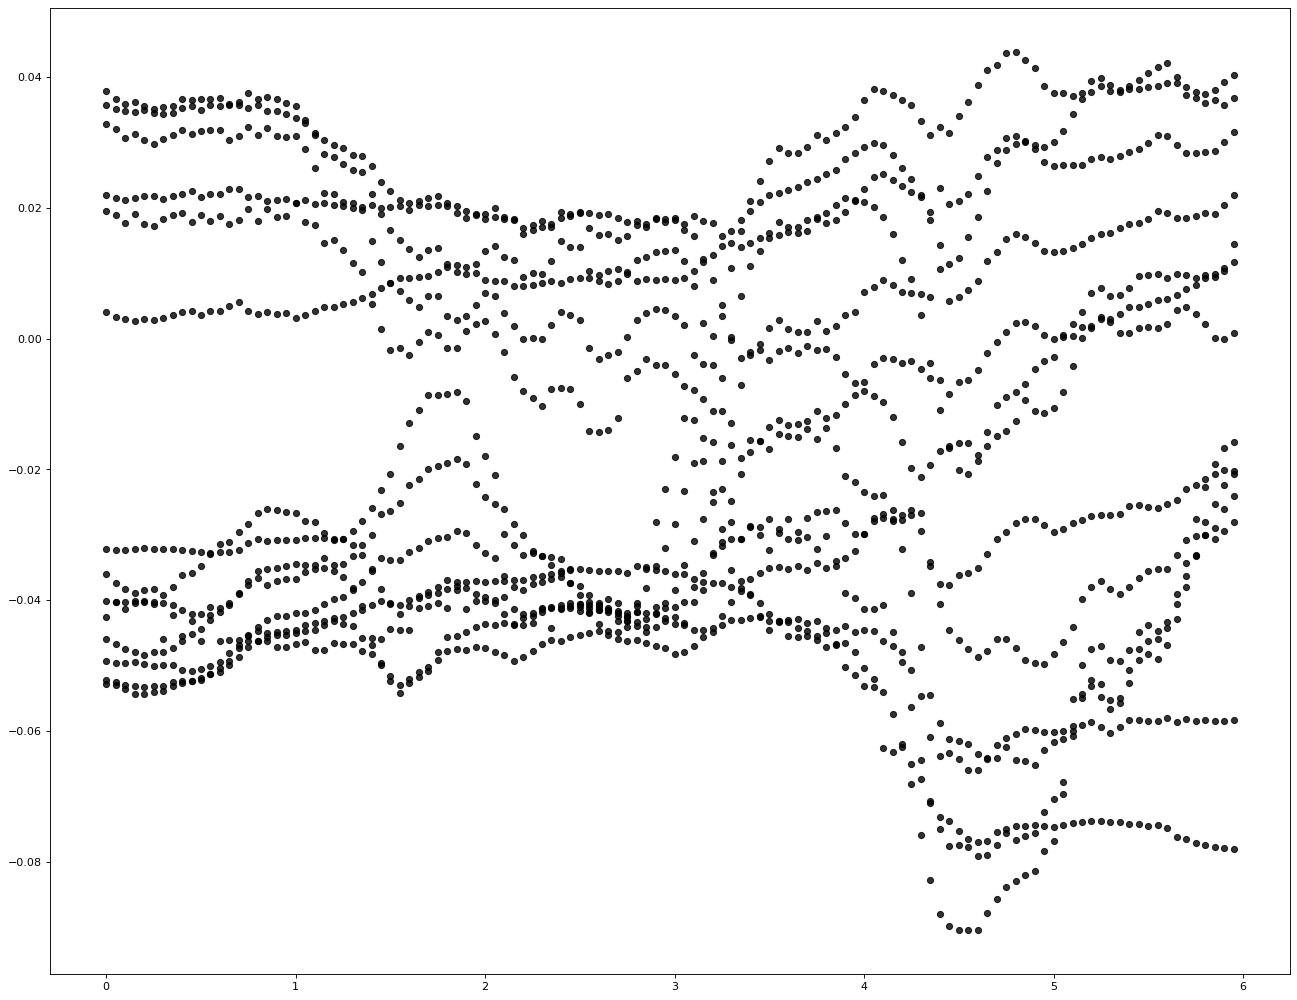

In [129]:
plt.figure(figsize=(20, 16), dpi=80)
plt.scatter(times_data, x_data,s=30,alpha=0.8,c='k')
# plt.plot(times_data, x_data)

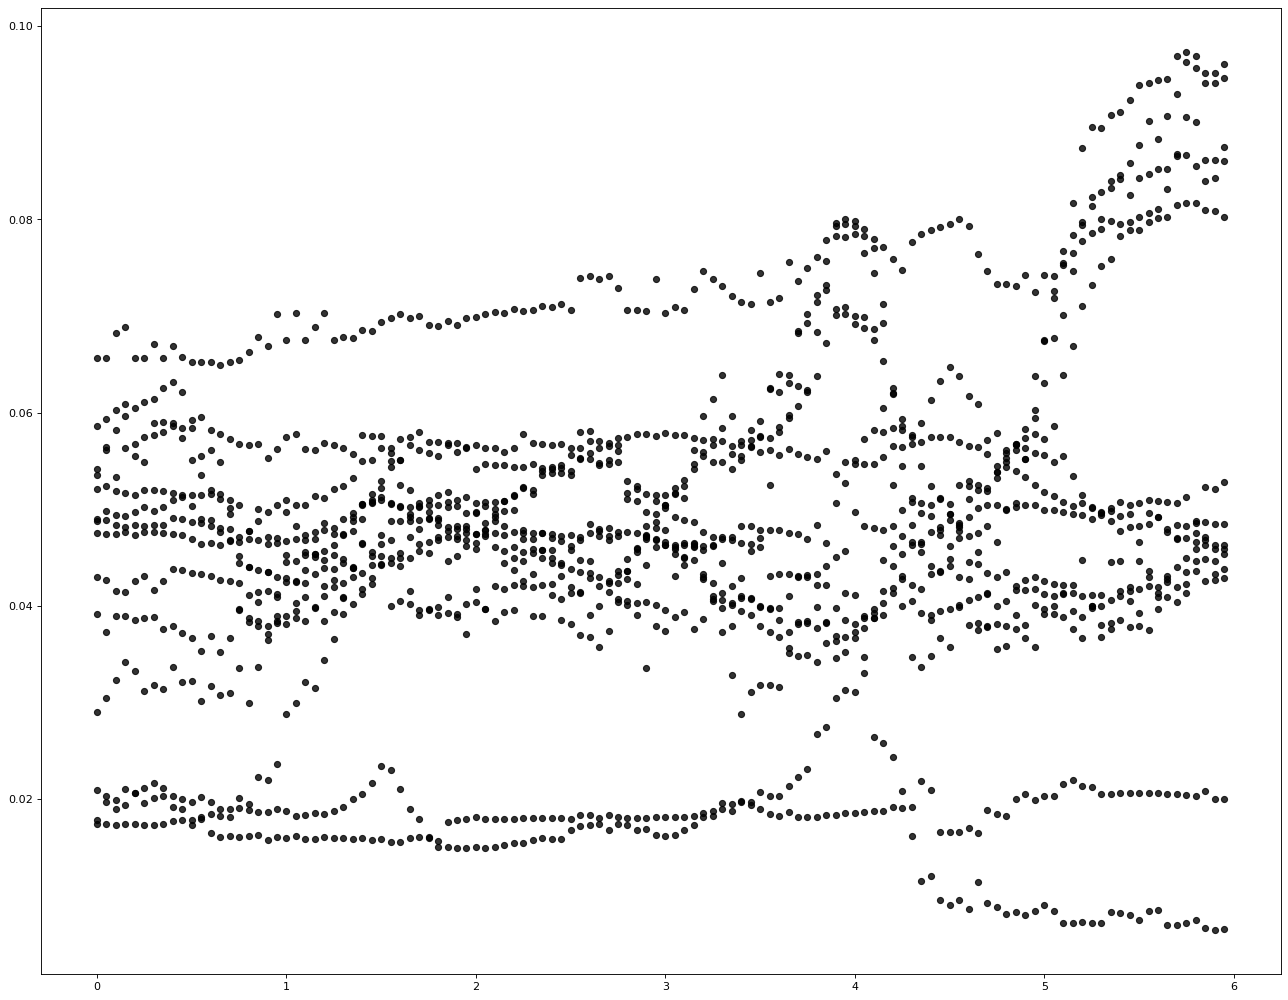

In [130]:
plt.figure(figsize=(20, 16), dpi=80)
plt.scatter(times_data, y_data,s=30,alpha=0.8,c='k')
# plt.plot(times_data, y_data)

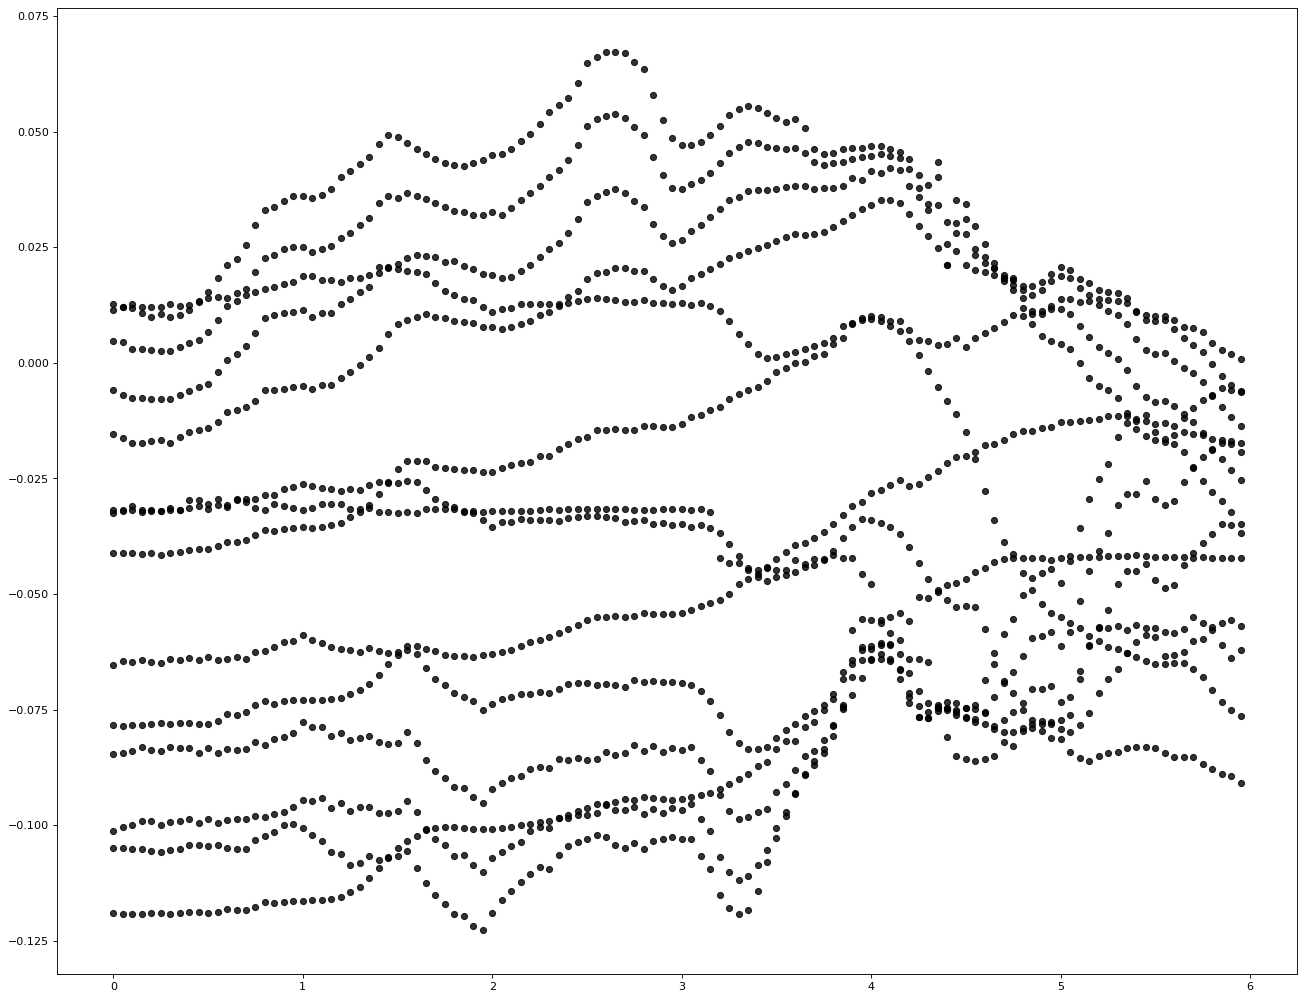

In [131]:
plt.figure(figsize=(20, 16), dpi=80)
plt.scatter(times_data, z_data,s=30,alpha=0.8,c='k')
# plt.plot(times_data, z_data)

In [133]:
help(torch.cat)

Help on built-in function cat:

cat(...)
    cat(tensors, dim=0, *, out=None) -> Tensor
    
    Concatenates the given sequence of :attr:`seq` tensors in the given dimension.
    All tensors must either have the same shape (except in the concatenating
    dimension) or be empty.
    
    :func:`torch.cat` can be seen as an inverse operation for :func:`torch.split`
    and :func:`torch.chunk`.
    
    :func:`torch.cat` can be best understood via examples.
    
    Args:
        tensors (sequence of Tensors): any python sequence of tensors of the same type.
            Non-empty tensors provided must have the same shape, except in the
            cat dimension.
        dim (int, optional): the dimension over which the tensors are concatenated
    
    Keyword args:
        out (Tensor, optional): the output tensor.
    
    Example::
    
        >>> x = torch.randn(2, 3)
        >>> x
        tensor([[ 0.6580, -1.0969, -0.4614],
                [-0.1034, -0.5790,  0.1497]])
        >>